## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = '../data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [10]:
app_train['AMT_INCOME_TOTAL_GRP'] = pd.qcut(app_train['AMT_INCOME_TOTAL'],10)
print(app_train['AMT_INCOME_TOTAL_GRP'].value_counts())
# app_train.loc[:,['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_GRP']]
# print((app_train['AMT_INCOME_TOTAL'] <= 112500.0).sum())
# print((app_train['AMT_INCOME_TOTAL'] < 135000.0).sum())
# print((app_train['AMT_INCOME_TOTAL'] == 135000.0).sum())

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: AMT_INCOME_TOTAL_GRP, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


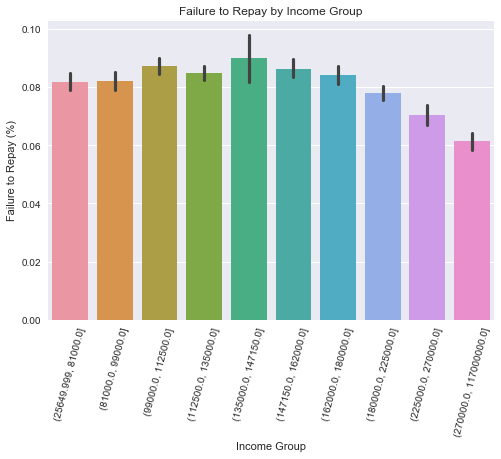

In [11]:
import seaborn as sns # 另一個繪圖-樣式套件
sns.barplot(app_train['AMT_INCOME_TOTAL_GRP'],app_train['TARGET'])
plt.legend()
plt.xticks(rotation = 75); plt.xlabel('Income Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Income Group');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


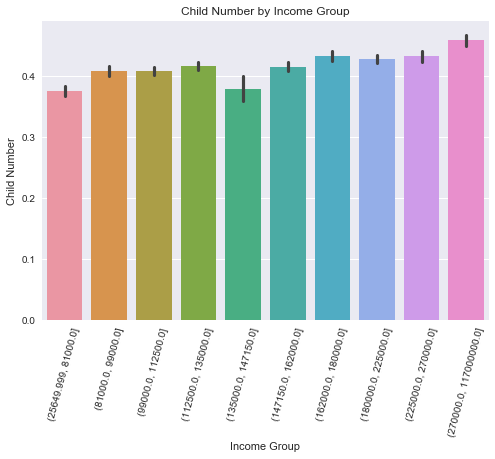

In [13]:
sns.barplot(app_train['AMT_INCOME_TOTAL_GRP'],app_train['CNT_CHILDREN'],)
plt.legend()
plt.xticks(rotation = 75); plt.xlabel('Income Group'); plt.ylabel('Child Number')
plt.title('Child Number by Income Group');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


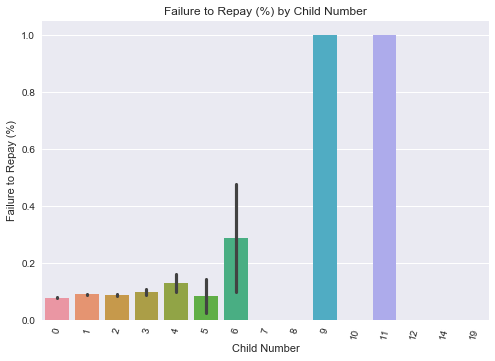

In [15]:
sns.barplot(app_train['CNT_CHILDREN'],app_train['TARGET'])
plt.legend()
plt.xticks(rotation = 75); plt.xlabel('Child Number'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay (%) by Child Number');


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


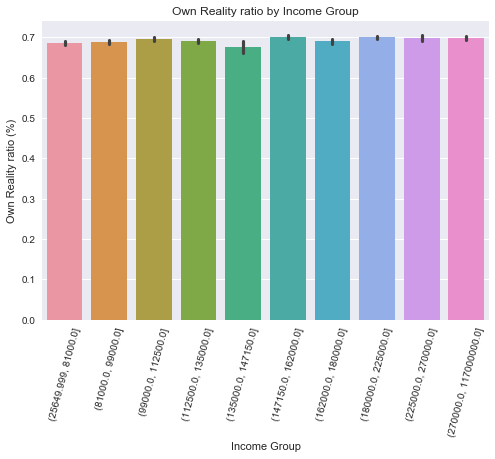

In [18]:
sns.barplot(app_train['AMT_INCOME_TOTAL_GRP'],app_train['FLAG_OWN_REALTY'])
plt.legend()
plt.xticks(rotation = 75); plt.xlabel('Income Group'); plt.ylabel('Ratio Not Own Reality (%)')
plt.title('Ratio Not Own Reality by Income Group');

In [19]:
app_train['AMT_CREDIT_GRP'] = pd.qcut(app_train['AMT_CREDIT'],10)
print(app_train['AMT_CREDIT_GRP'].value_counts())

(604152.0, 755190.0]      34066
(44999.999, 180000.0]     33204
(180000.0, 254700.0]      31721
(432000.0, 513531.0]      30826
(513531.0, 604152.0]      30726
(306306.0, 432000.0]      30707
(1133748.0, 4050000.0]    30593
(755190.0, 900000.0]      29958
(900000.0, 1133748.0]     28319
(254700.0, 306306.0]      27391
Name: AMT_CREDIT_GRP, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


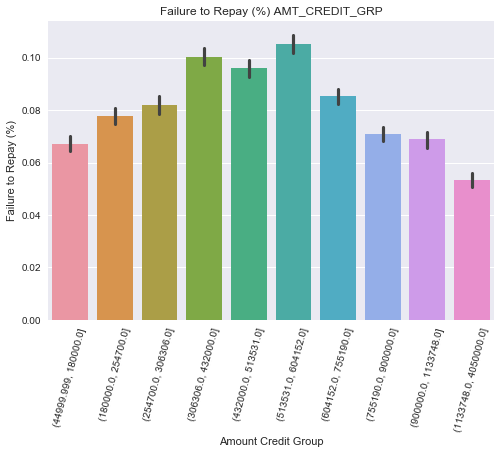

In [20]:
sns.barplot(app_train['AMT_CREDIT_GRP'],app_train['TARGET'])
plt.legend()
plt.xticks(rotation = 75); plt.xlabel('Amount Credit Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay (%) AMT_CREDIT_GRP');

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(app_train['AMT_CREDIT_GRP'])
app_train['AMT_CREDIT_GRP_LABEL'] = le.transform(app_train['AMT_CREDIT_GRP'])
le.fit(app_train['AMT_INCOME_TOTAL_GRP'])
app_train['AMT_INCOME_TOTAL_GRP_LABEL'] = le.transform(app_train['AMT_INCOME_TOTAL_GRP'])
#print(app_train.loc[0:100,['AMT_INCOME_TOTAL_GRP_LABEL','AMT_INCOME_TOTAL_GRP']])

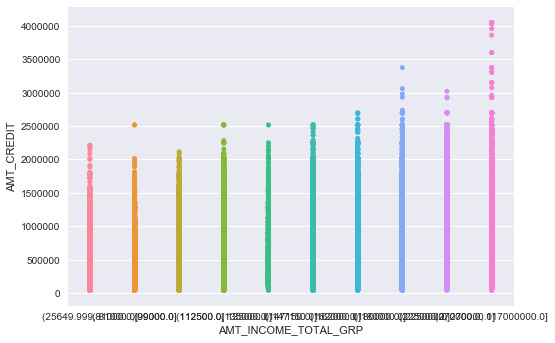

In [53]:
sns.stripplot(x='AMT_INCOME_TOTAL_GRP',y='AMT_CREDIT',data=app_train)

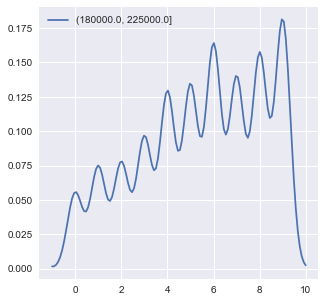

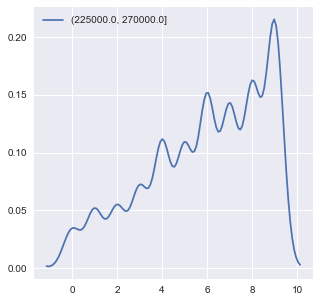

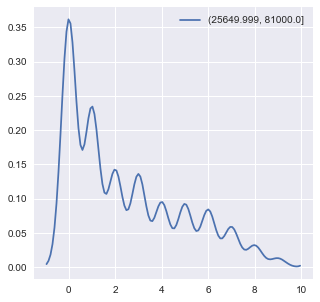

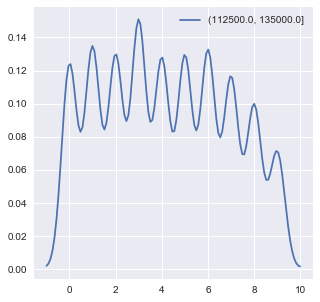

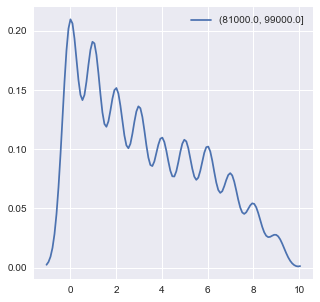

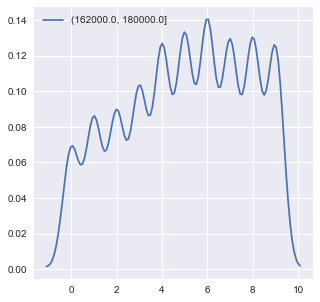

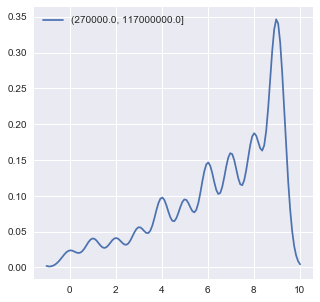

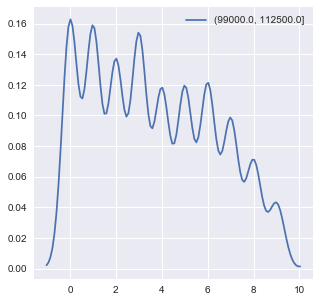

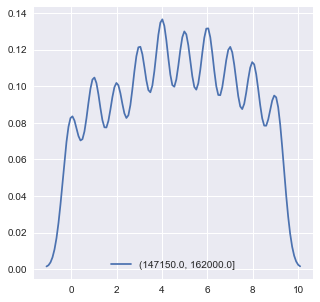

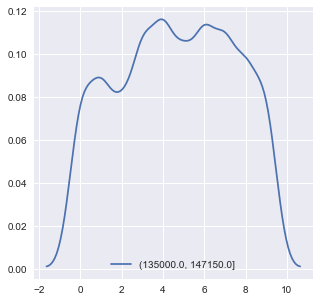

In [83]:
amt_income_list = app_train['AMT_INCOME_TOTAL_GRP'].unique()
sns.set(rc={'figure.figsize':(5,5)})
for i in range(len(amt_income_list)):
#for i in [0]:
    curr_income_range = amt_income_list[i]
# # print(type(curr_income_range))
# # print("\n",curr_income_range)
#     print(sum(app_train['AMT_INCOME_TOTAL_GRP']==curr_income_range))
#     print(app_train.loc[app_train['AMT_INCOME_TOTAL_GRP']==curr_income_range,'AMT_CREDIT_GRP_LABEL'])
    plt.figure(i)
    sns.kdeplot(app_train.loc[app_train['AMT_INCOME_TOTAL_GRP']==curr_income_range,'AMT_CREDIT_GRP_LABEL'],label=str(curr_income_range))
# #     plt.xticks(rotation = 75); plt.xlabel('Amount Credit Group'); plt.ylabel('Amount Income Group')
# # plt.title('Amount Credit Group to Amount Income Group');
sns.set(rc={'figure.figsize':(15,15)})
for i in range(len(amt_income_list)):
plt.figure(i)
sns.kdeplot(app_train.loc[app_train['AMT_INCOME_TOTAL_GRP']==curr_income_range,'AMT_CREDIT_GRP_LABEL'],label=str(curr_income_range))

In [31]:
print(app_train['AMT_CREDIT_GRP'].unique()[0])

(306306.0, 432000.0]


In [63]:
sum(app_train['AMT_INCOME_TOTAL_GRP']==curr_income_range)

19957